In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('/content/train (3) (1).csv')
data.head()
df=data.copy()

In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

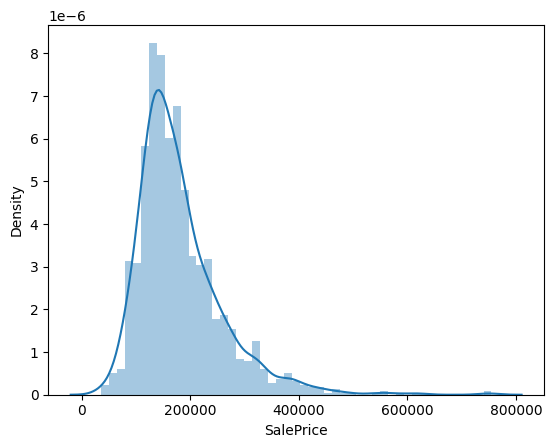

In [7]:
sns.distplot(data['SalePrice']);

In [8]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

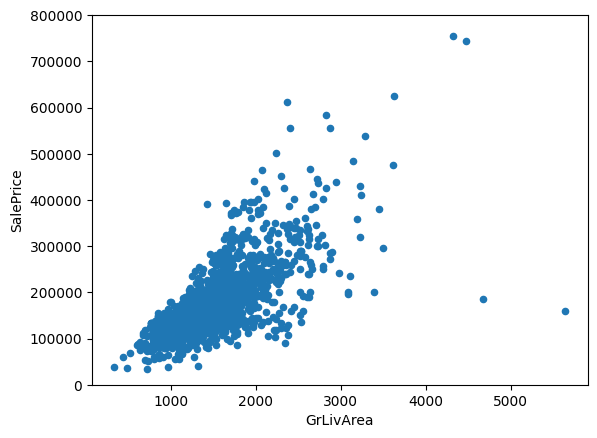

In [9]:
var = 'GrLivArea'
bi_plot=pd.concat([data['SalePrice'], data[var]], axis=1)
bi_plot.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

This shows that there is a linear relationship between salePrice and GrLivArea if outliers are taken care of.

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

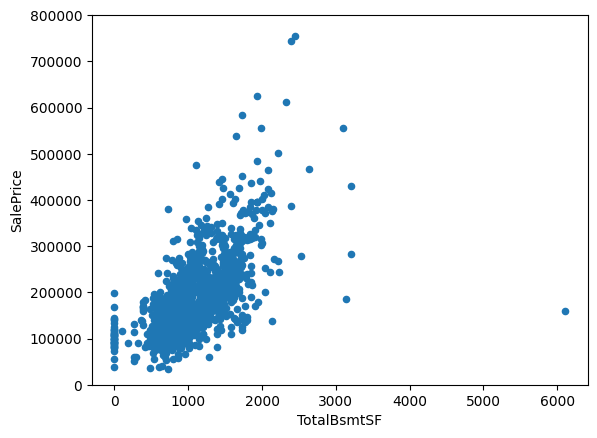

In [10]:
var = 'TotalBsmtSF'
bi_plot=pd.concat([data['SalePrice'], data[var]], axis=1)
bi_plot.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<Axes: xlabel='OverallQual', ylabel='count'>

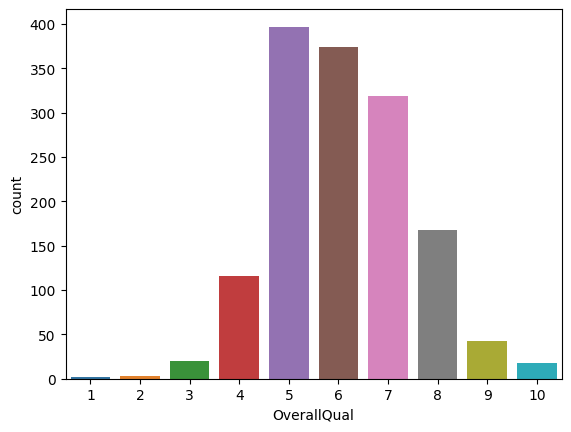

In [11]:
sns.countplot(x=data['OverallQual'])

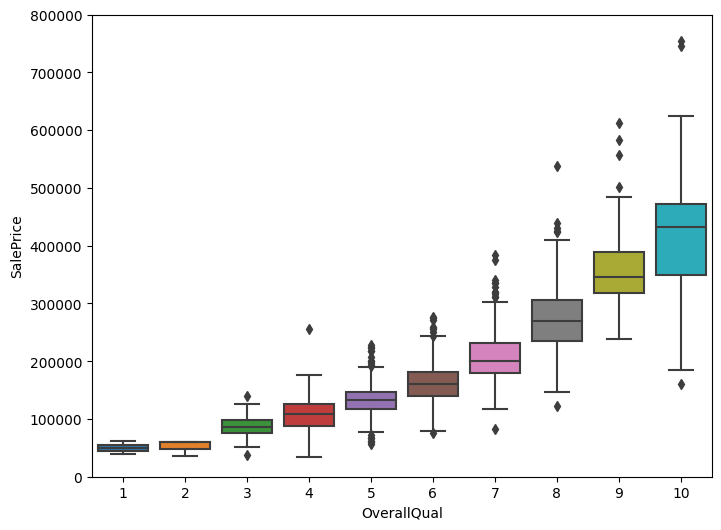

In [12]:
var = 'OverallQual'
df2 = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=df2)
fig.axis(ymin=0, ymax=800000);

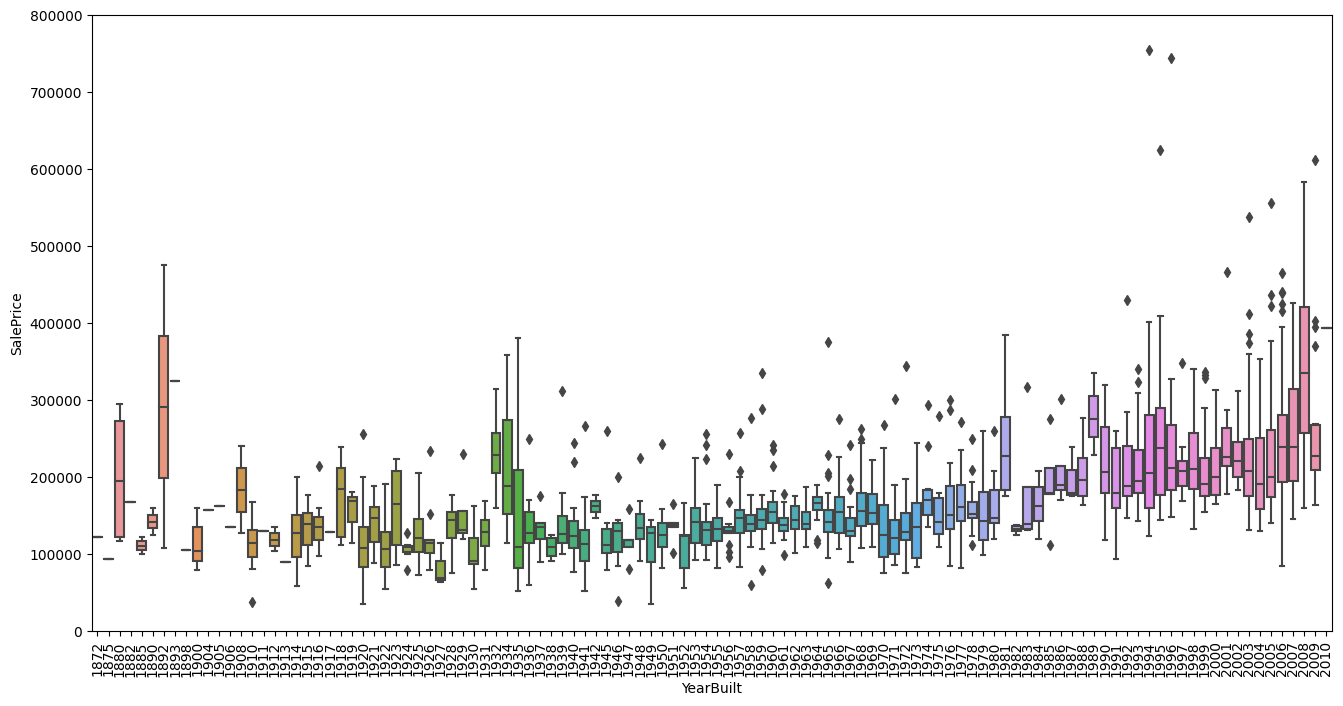

In [13]:
var = 'YearBuilt'
df3 = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=df3)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

<Axes: >

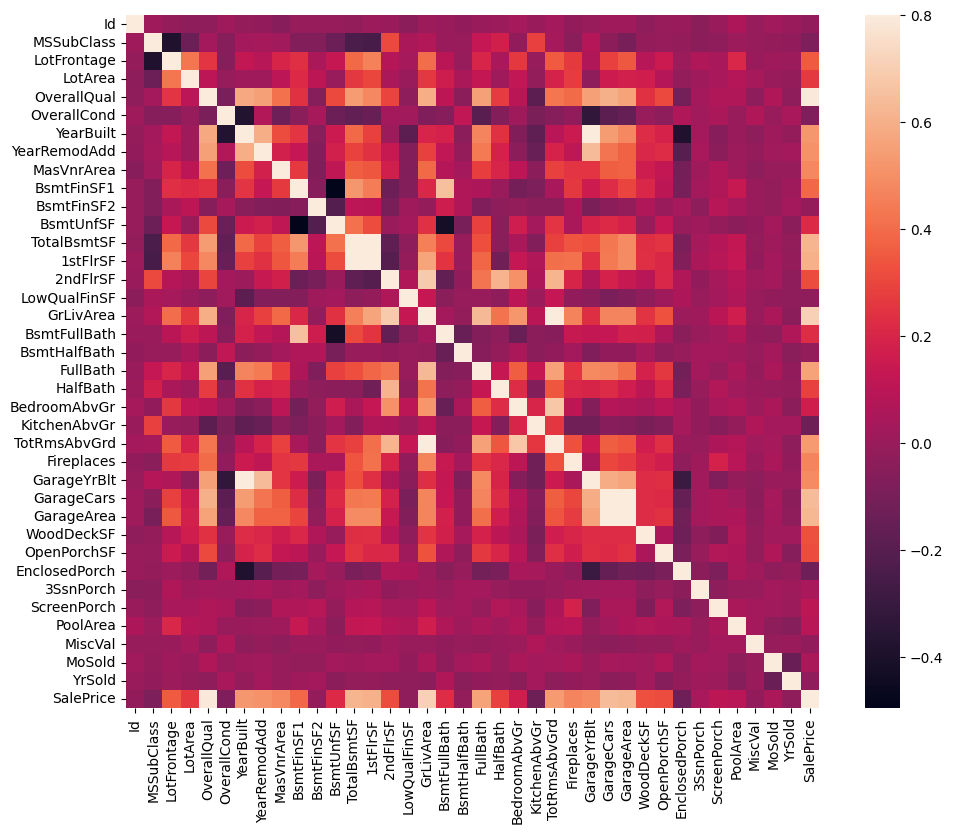

In [14]:
corr_mat=data.corr()
f, ax= plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat, vmax=0.8, square=True)

In [15]:
corr_mat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


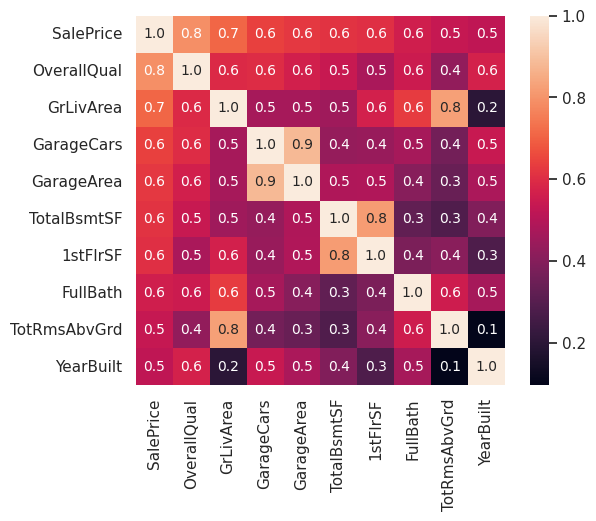

In [16]:

k = 10  # number of variables for heatmap

# Select the columns with the highest correlation with 'SalePrice'
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index

# Calculate the correlation matrix for the selected columns
cm = np.corrcoef(data[cols].values.T)

# Set the font scale for the heatmap
sns.set(font_scale=1)

# Create the heatmap using seaborn
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)

# Display the heatmap
plt.show()


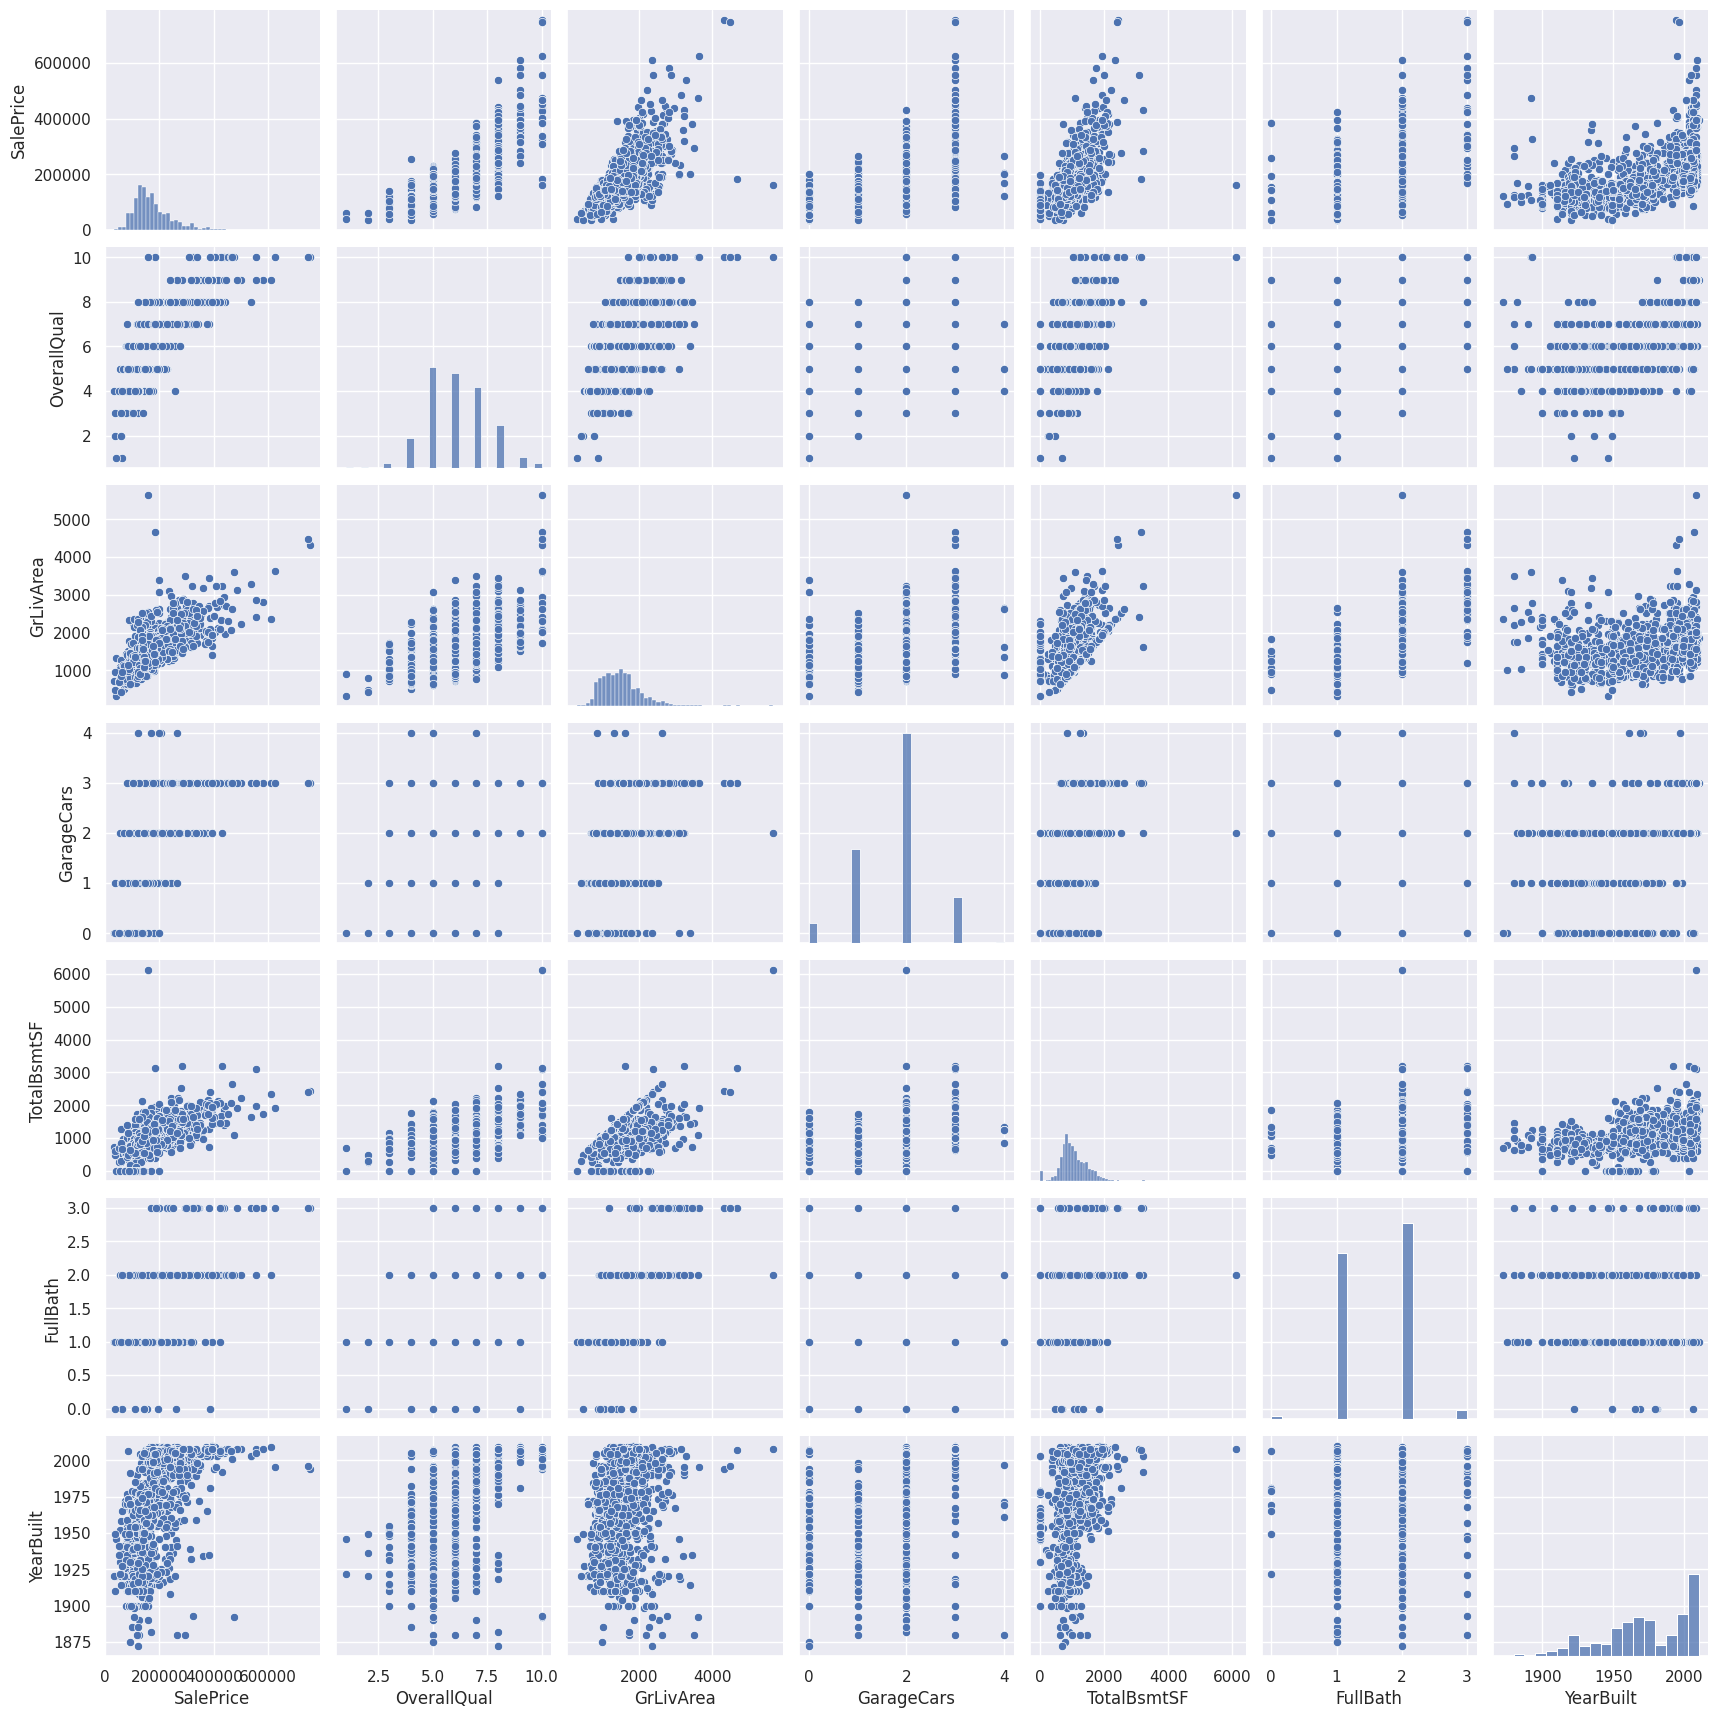

In [17]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [18]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [19]:
#dealing with missing data
data = data.drop((missing_data[missing_data['Total'] > 1]).index,1)
data = data.drop(data.loc[data['Electrical'].isnull()].index)
data.isnull().sum().max() #just checking that there's no missing data missing...

0

In [20]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

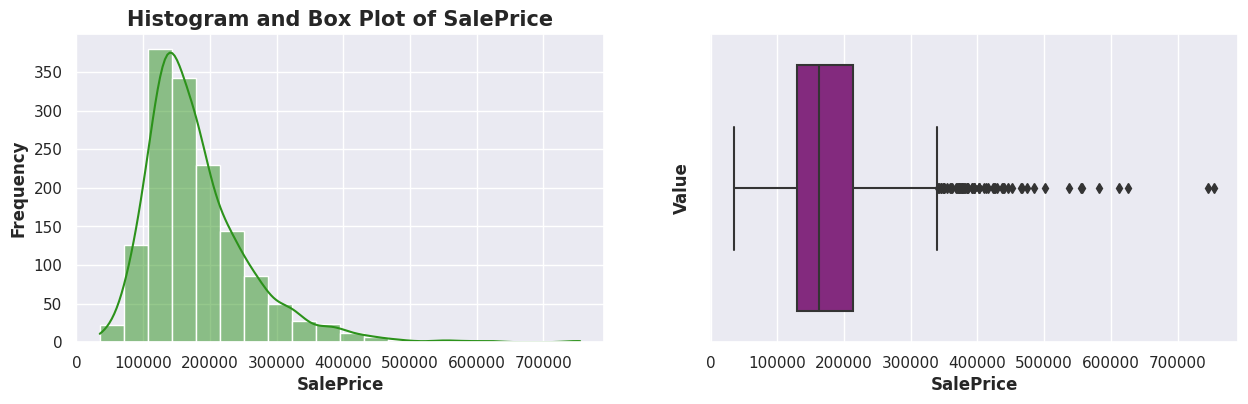

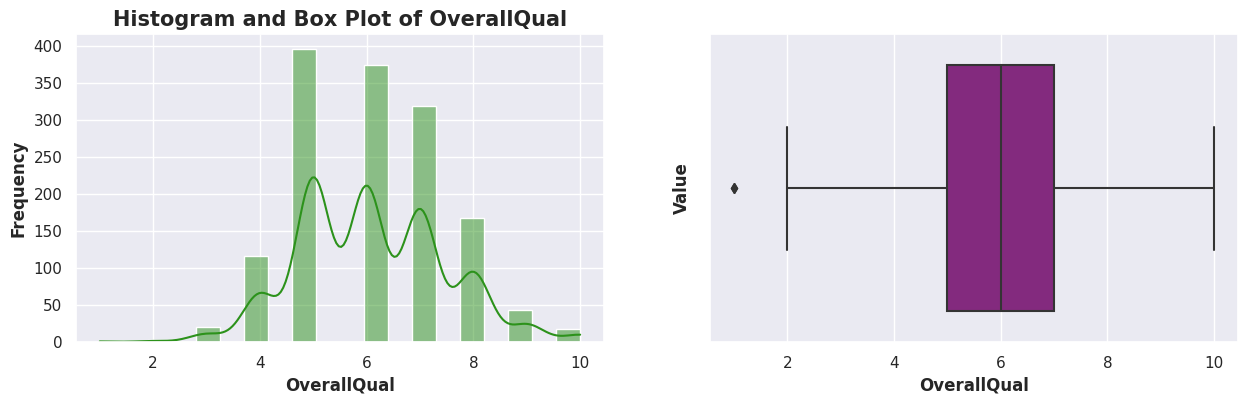

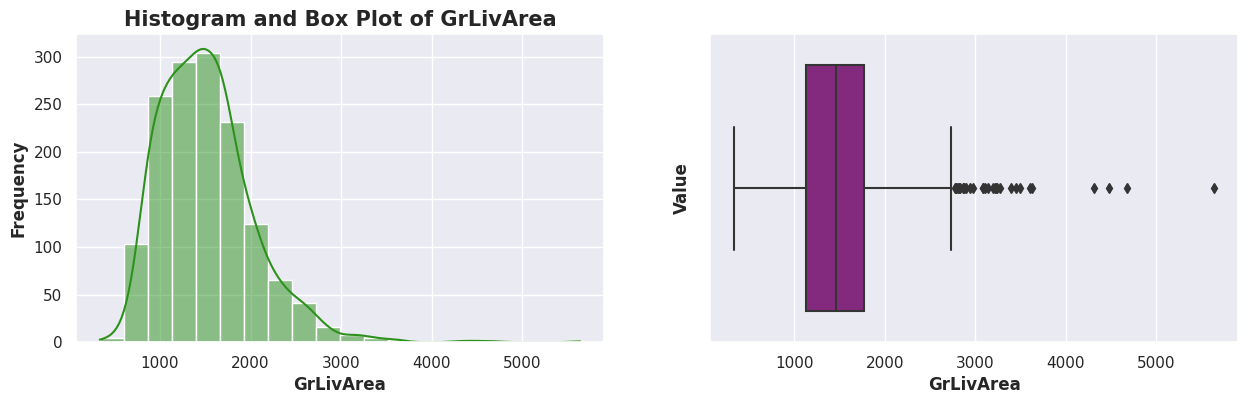

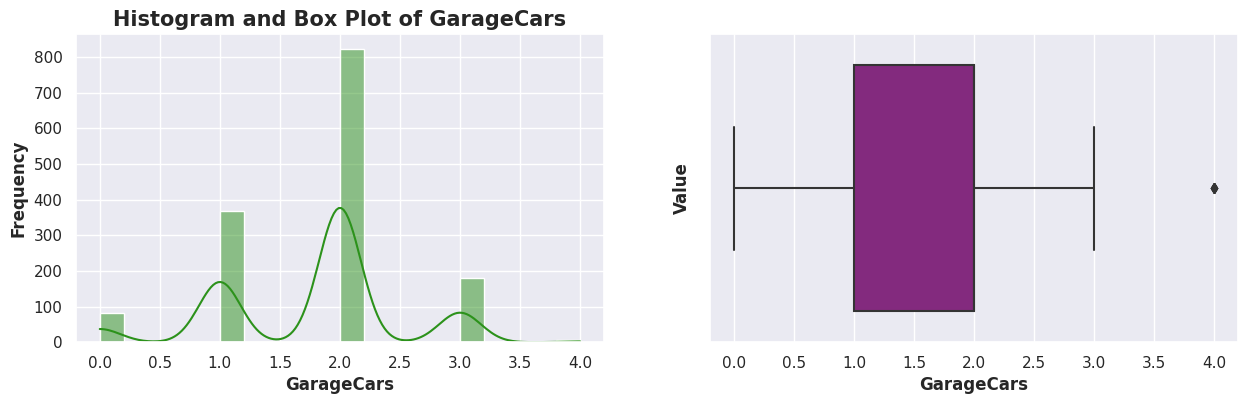

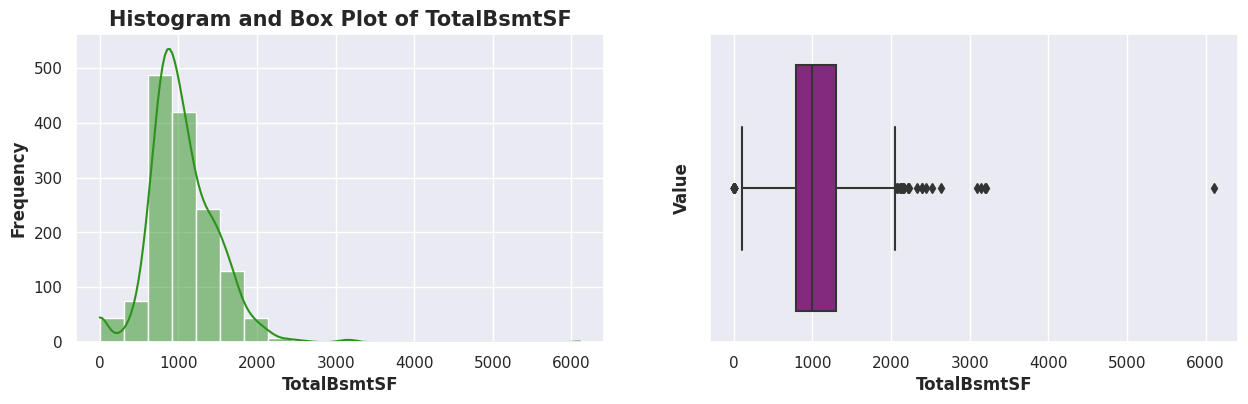

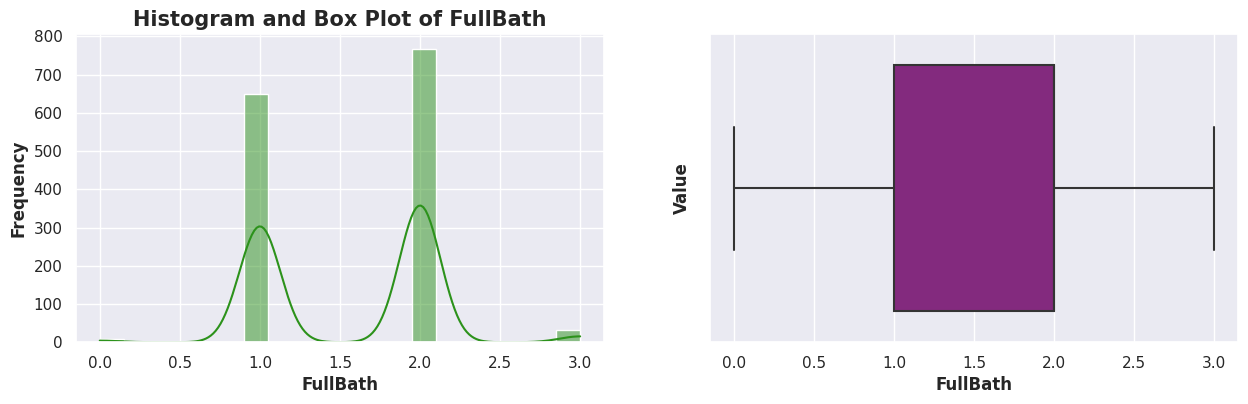

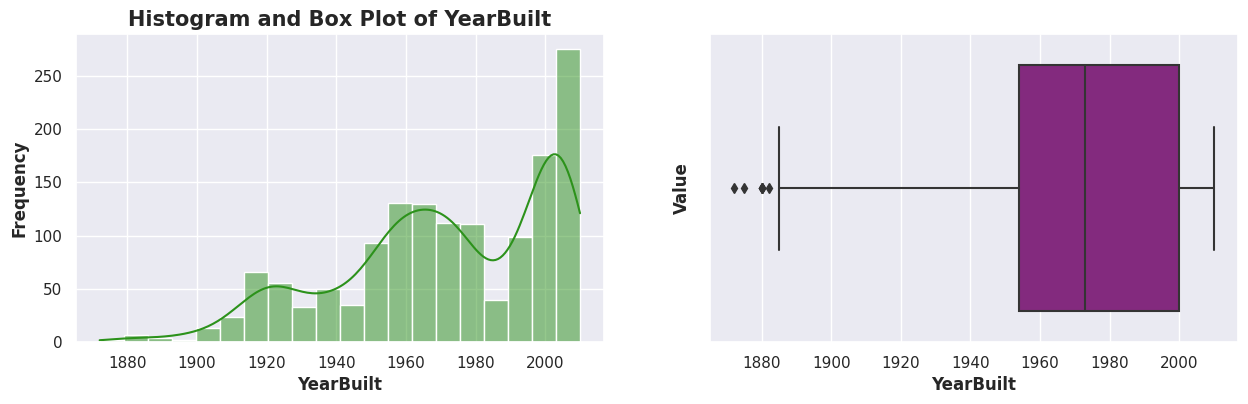

In [21]:
col_outliers=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

#creating function to plot outliers columns
def plot_hist_box(data, column):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))
    sns.histplot(data=data, x=column, bins=20, kde=True, ax=ax1, color='#2c921b')
    sns.boxplot(data=data, x=column, ax=ax2, color='#921b8b')
    ax1.set_title(f"Histogram and Box Plot of {column}", size=15, weight='bold')
    ax1.set_xlabel(column, size=12, weight='bold')
    ax1.set_ylabel("Frequency", size=12, weight='bold')
    ax2.set_xlabel(column, size=12, weight='bold')
    ax2.set_ylabel("Value", size=12, weight='bold')
    plt.show()
#Showing all the columns in one action
for col in col_outliers:
    plot_hist_box(data, col)

In [22]:
import numpy as np
import pandas as pd
from scipy.stats import chi2




mean_x = data['GrLivArea'].mean()
mean_y = data['SalePrice'].mean()

# Calculate the covariance matrix
cov_matrix = np.cov(data['GrLivArea'], data['SalePrice'])

# Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calculate the Mahalanobis distance for each data point
mahalanobis_distances = []
for i in range(len(data)):
    x_diff = data['GrLivArea'].iloc[i] - mean_x
    y_diff = data['SalePrice'].iloc[i] - mean_y
    point = np.array([x_diff, y_diff])
    mahalanobis_distance = np.sqrt(np.dot(np.dot(point, inv_cov_matrix), point.T))
    mahalanobis_distances.append(mahalanobis_distance)

# Set the threshold for outlier detection based on the chi-square distribution
alpha = 0.05  # significance level
df = 2       # degrees of freedom (number of variables)
threshold = chi2.ppf(1 - alpha, df)

# Identify the bivariate outliers
outliers = data[mahalanobis_distances > threshold]
outliers
# Remove bivariate outliers from the DataFrame
data = data[mahalanobis_distances <= threshold]


In [23]:
mean_x = data['TotalBsmtSF'].mean()
mean_y = data['SalePrice'].mean()

# Calculate the covariance matrix
cov_matrix = np.cov(data['TotalBsmtSF'], data['SalePrice'])

# Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calculate the Mahalanobis distance for each data point
mahalanobis_distances = []
for i in range(len(data)):
    x_diff = data['TotalBsmtSF'].iloc[i] - mean_x
    y_diff = data['SalePrice'].iloc[i] - mean_y
    point = np.array([x_diff, y_diff])
    mahalanobis_distance = np.sqrt(np.dot(np.dot(point, inv_cov_matrix), point.T))
    mahalanobis_distances.append(mahalanobis_distance)

# Set the threshold for outlier detection based on the chi-square distribution
alpha = 0.05  # significance level
df = 2       # degrees of freedom (number of variables)
threshold = chi2.ppf(1 - alpha, df)

# Identify the bivariate outliers
outliers = data[mahalanobis_distances > threshold]
outliers
# Remove bivariate outliers from the DataFrame
data = data[mahalanobis_distances <= threshold]


In [24]:
data.drop("Id",axis=1,inplace=True)

In [25]:
data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


Taking a look at Target Variable


 mu = 179556.81 and sigma = 75004.40



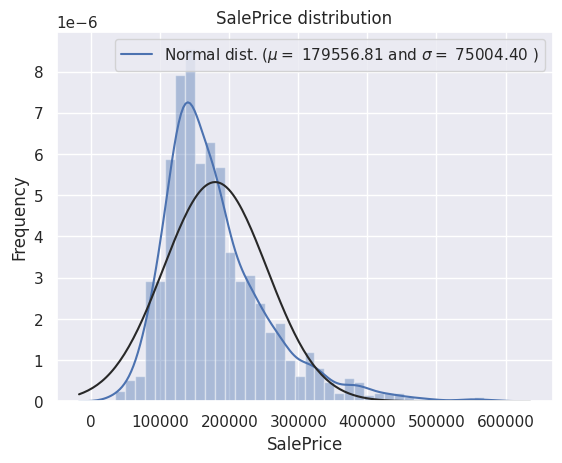

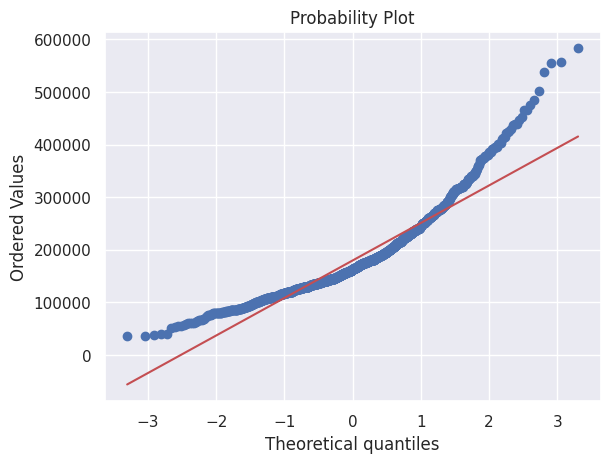

In [26]:
sns.distplot(data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.


 mu = 12.02 and sigma = 0.39



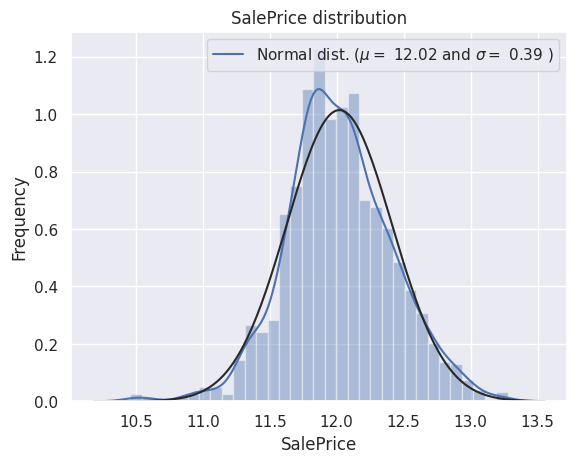

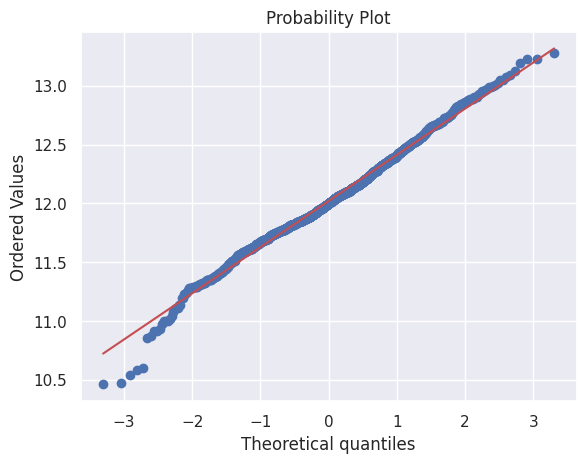

In [27]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
data["SalePrice"] = np.log1p(data["SalePrice"])

#Check the new distribution
sns.distplot(data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

In [28]:
cols=list(data.select_dtypes(include='object'))
cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1453 non-null   int64  
 1   MSZoning       1453 non-null   object 
 2   LotArea        1453 non-null   int64  
 3   Street         1453 non-null   object 
 4   LotShape       1453 non-null   object 
 5   LandContour    1453 non-null   object 
 6   Utilities      1453 non-null   object 
 7   LotConfig      1453 non-null   object 
 8   LandSlope      1453 non-null   object 
 9   Neighborhood   1453 non-null   object 
 10  Condition1     1453 non-null   object 
 11  Condition2     1453 non-null   object 
 12  BldgType       1453 non-null   object 
 13  HouseStyle     1453 non-null   object 
 14  OverallQual    1453 non-null   int64  
 15  OverallCond    1453 non-null   int64  
 16  YearBuilt      1453 non-null   int64  
 17  YearRemodAdd   1453 non-null   int64  
 18  RoofStyl

In [30]:
# Adding total sqfootage feature
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [31]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.393047
PoolArea,17.486337
LotArea,12.642368
3SsnPorch,10.268380
LowQualFinSF,8.979687
KitchenAbvGr,4.471464
BsmtFinSF2,4.239192
BsmtHalfBath,4.119739
ScreenPorch,4.106460
EnclosedPorch,3.077203


In [32]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    data[feat] = boxcox1p(data[feat], lam)

#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 35 skewed numerical features to Box Cox transform


In [33]:
data = pd.get_dummies(data)

In [34]:
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5.684507,19.212182,2.440268,2.055642,14.187527,14.187527,11.170327,0.0,7.483296,11.692623,...,0,0,0,1,0,0,0,0,1,0
1,3.858807,19.712205,2.259674,2.602594,14.145138,14.145138,12.062832,0.0,8.897844,12.792276,...,0,0,0,1,0,0,0,0,1,0
2,5.684507,20.347241,2.440268,2.055642,14.184404,14.185966,10.200343,0.0,9.917060,11.892039,...,0,0,0,1,0,0,0,0,1,0
3,5.968981,19.691553,2.440268,2.055642,14.047529,14.135652,8.274266,0.0,10.468500,11.354094,...,0,0,0,1,1,0,0,0,0,0
4,5.684507,21.325160,2.602594,2.055642,14.182841,14.182841,10.971129,0.0,10.221051,12.510588,...,0,0,0,1,0,0,0,0,1,0


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
y=data['SalePrice']
data.drop('SalePrice',axis=1,inplace=True)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.30, random_state=42)

In [38]:
!pip install lazypredict

In [39]:
#importing lazypredict for model training
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [40]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric = None)

In [41]:
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [38:24<00:00, 54.86s/it]


In [42]:
print(models)

                                                              Adjusted R-Squared  \
Model                                                                              
ElasticNetCV                                                                0.83   
LassoCV                                                                     0.83   
LassoLarsIC                                                                 0.82   
BayesianRidge                                                               0.82   
PoissonRegressor                                                            0.82   
RidgeCV                                                                     0.81   
LassoLarsCV                                                                 0.81   
HuberRegressor                                                              0.81   
Ridge                                                                       0.81   
LarsCV                                                                      

In [46]:
X_train.shape

(1017, 220)

In [47]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [48]:
model_ridge = Ridge()

In [49]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean()
            for alpha in alphas]

Text(0, 0.5, 'rmse')

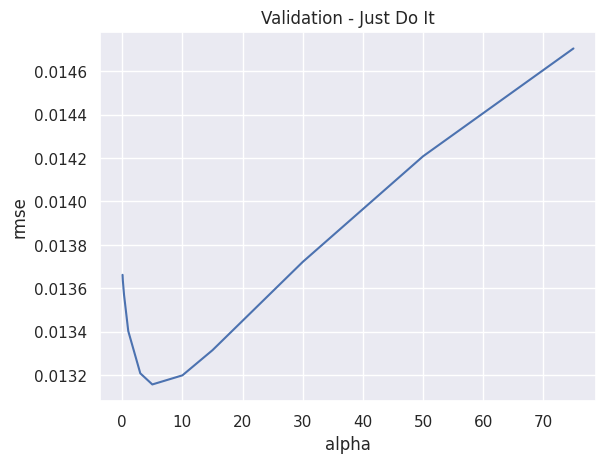

In [50]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [51]:
cv_ridge.min()

0.013157302740737129

In [52]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [53]:
rmse_cv(model_lasso).mean()

0.014948070233526614